In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from haversine import haversine
from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

In [2]:
je = pd.read_csv("jamb_exam_results.csv")
je

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [7]:
je.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [6]:
je.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [3]:
je.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')

In [9]:
je.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

In [8]:
je.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [10]:
#In the Parent_Education_Level column replace null values with Mode value 
je["Parent_Education_Level"].mode()

0    Secondary
Name: Parent_Education_Level, dtype: object

In [11]:
# Fill the null value with mode value
je["Parent_Education_Level"] = je["Parent_Education_Level"].fillna("Secondary")

In [12]:
je.isnull().sum()

JAMB_Score                      0
Study_Hours_Per_Week            0
Attendance_Rate                 0
Teacher_Quality                 0
Distance_To_School              0
School_Type                     0
School_Location                 0
Extra_Tutorials                 0
Access_To_Learning_Materials    0
Parent_Involvement              0
IT_Knowledge                    0
Student_ID                      0
Age                             0
Gender                          0
Socioeconomic_Status            0
Parent_Education_Level          0
Assignments_Completed           0
dtype: int64

## VISUALIZATION.

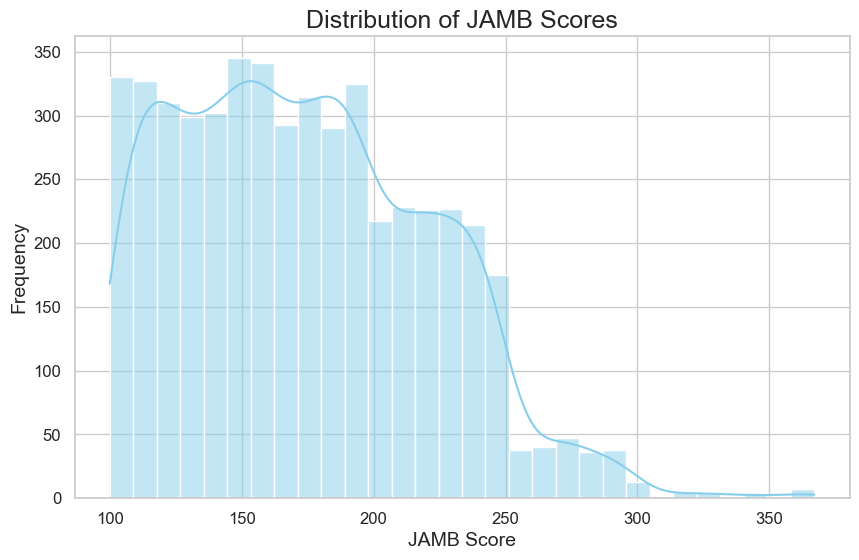

In [13]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.figure(figsize=(10, 6))
sns.histplot(je['JAMB_Score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of JAMB Scores')
plt.xlabel('JAMB Score')
plt.ylabel('Frequency')
plt.show()


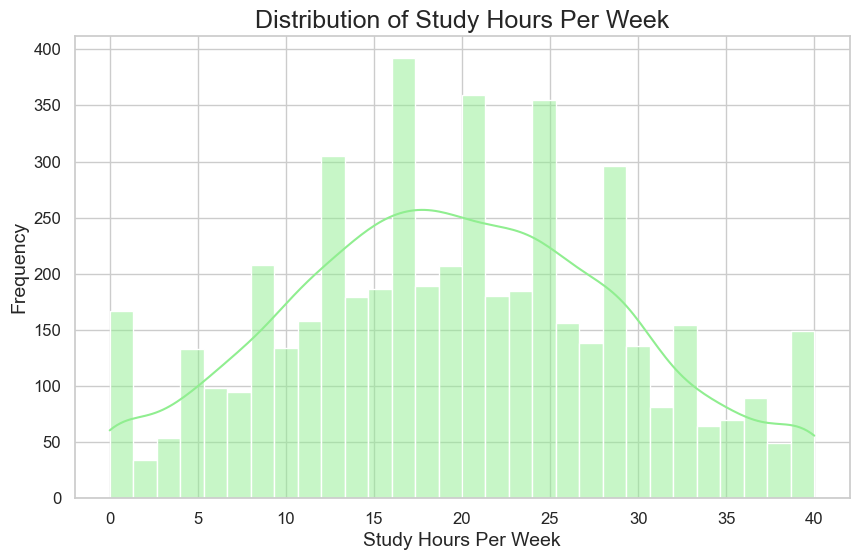

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(je['Study_Hours_Per_Week'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Study Hours Per Week')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')
plt.show()


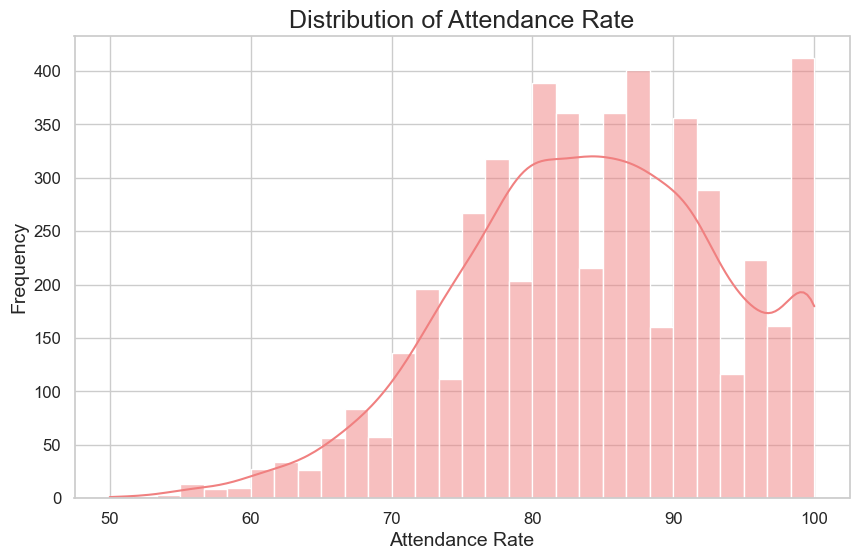

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(je['Attendance_Rate'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()


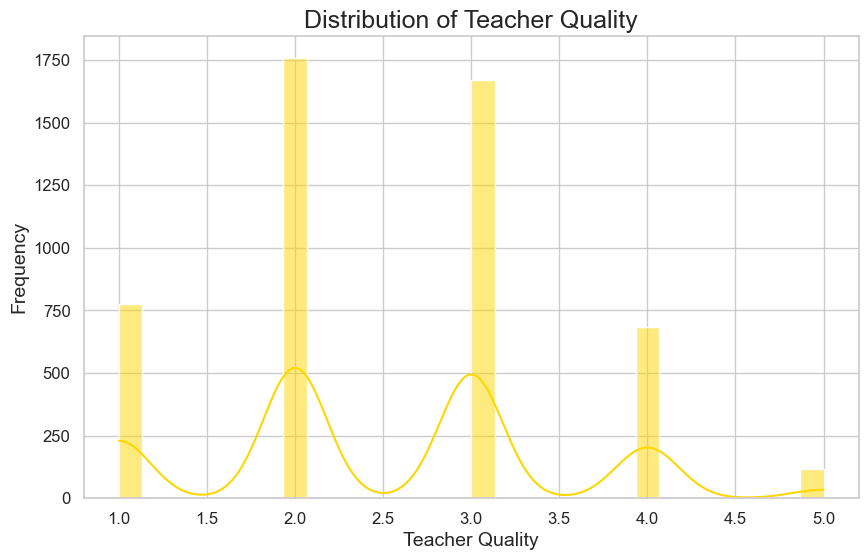

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(je['Teacher_Quality'], kde=True, bins=30, color='gold')
plt.title('Distribution of Teacher Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('Frequency')
plt.show()


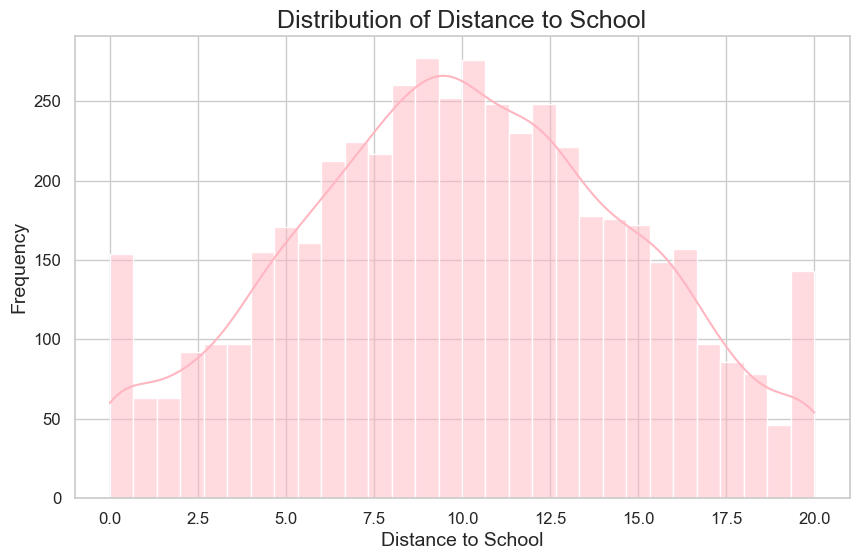

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(je['Distance_To_School'], kde=True, bins=30, color='lightpink')
plt.title('Distribution of Distance to School')
plt.xlabel('Distance to School')
plt.ylabel('Frequency')
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\1820597278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='School_Type', data=je, palette='pastel')


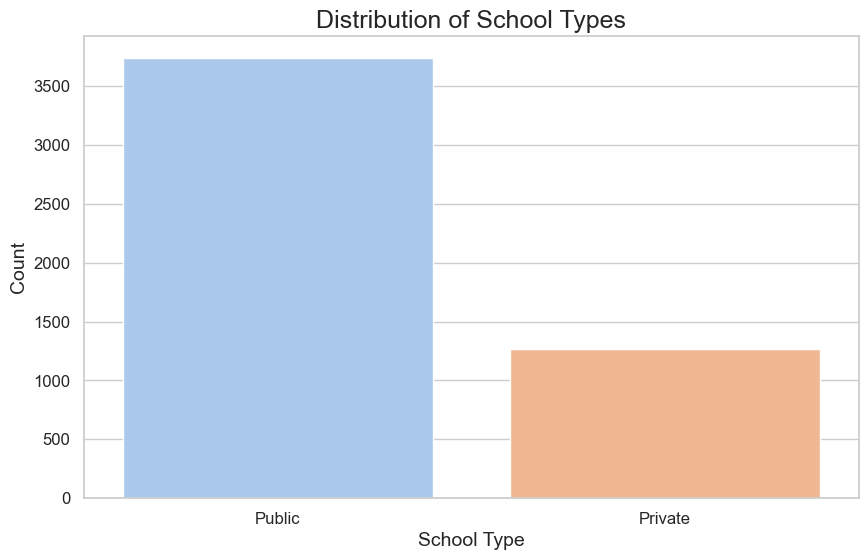

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='School_Type', data=je, palette='pastel')
plt.title('Distribution of School Types')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\786283053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='School_Location', data=je, palette='muted')


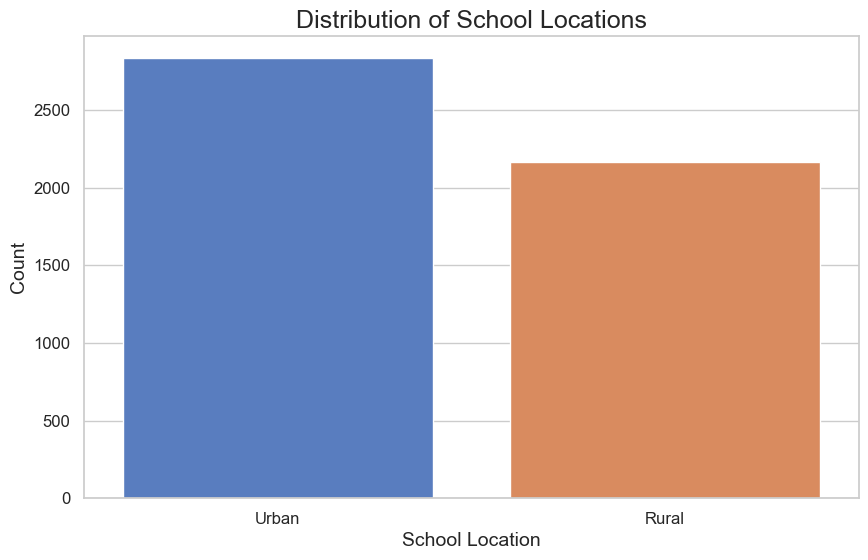

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='School_Location', data=je, palette='muted')
plt.title('Distribution of School Locations')
plt.xlabel('School Location')
plt.ylabel('Count')
plt.show()


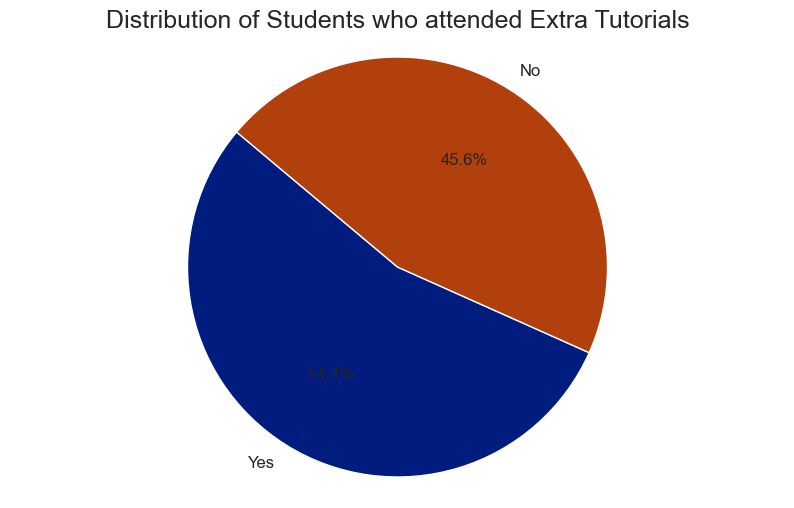

In [24]:
# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the count of each category in 'Extra_Tutorials'
extra_tutorials_counts = je['Extra_Tutorials'].value_counts()

# Define colors for the pie chart
colors = sns.color_palette('dark', len(extra_tutorials_counts))

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(extra_tutorials_counts, labels=extra_tutorials_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Students who attended Extra Tutorials')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\2204443318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parent_Involvement', data=je, palette='deep')


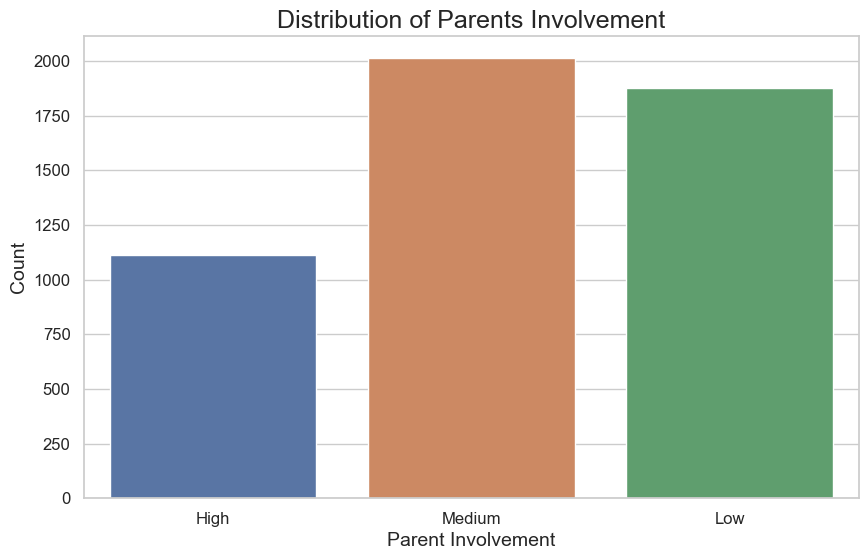

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parent_Involvement', data=je, palette='deep')
plt.title('Distribution of Parents Involvement')
plt.xlabel('Parent Involvement')
plt.ylabel('Count')
plt.show()


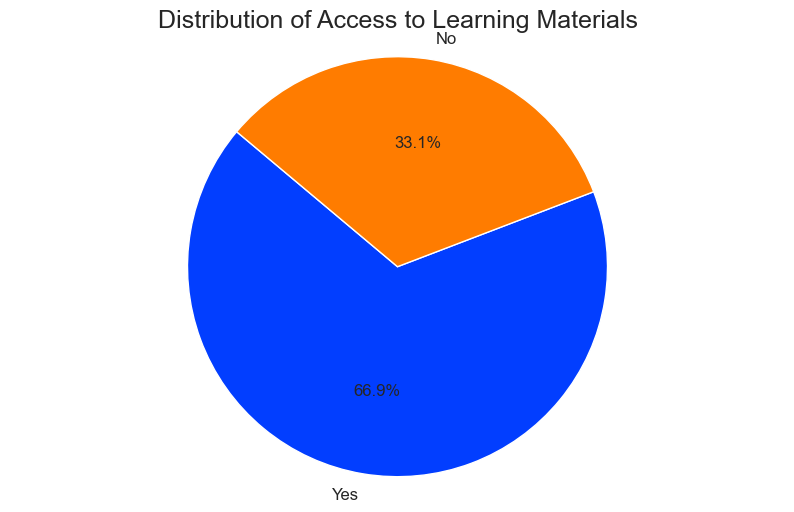

In [28]:
# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the count of each category in 'Access_To_Learning_Materials'
access_to_learning_materials_counts = je['Access_To_Learning_Materials'].value_counts()

# Define colors for the pie chart
colors = sns.color_palette('bright', len(access_to_learning_materials_counts))

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(access_to_learning_materials_counts, labels=access_to_learning_materials_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Access to Learning Materials')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\3654254070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IT_Knowledge', data=je, palette='colorblind')


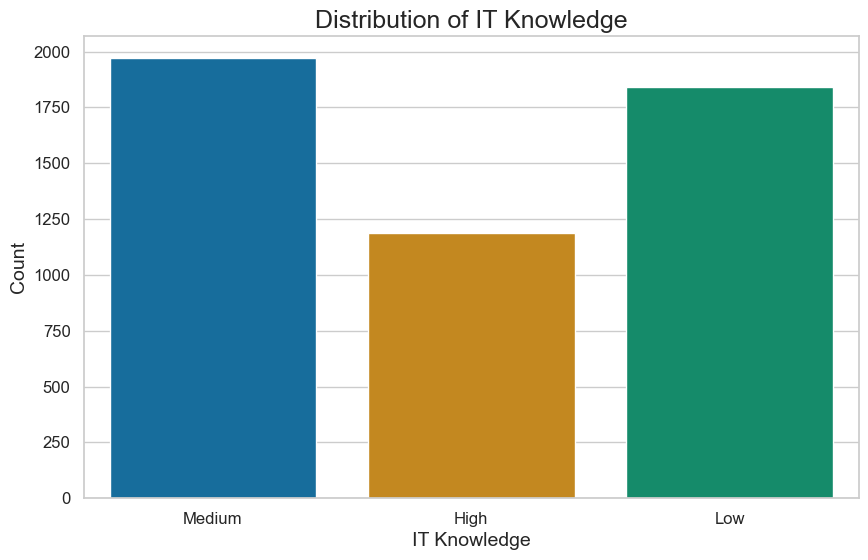

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='IT_Knowledge', data=je, palette='colorblind')
plt.title('Distribution of IT Knowledge')
plt.xlabel('IT Knowledge')
plt.ylabel('Count')
plt.show()


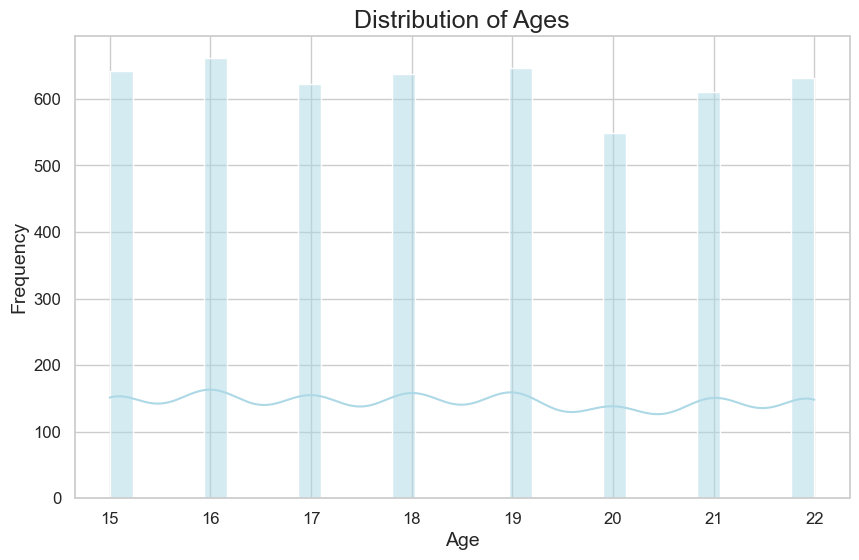

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(je['Age'], kde=True, bins=30, color='lightblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


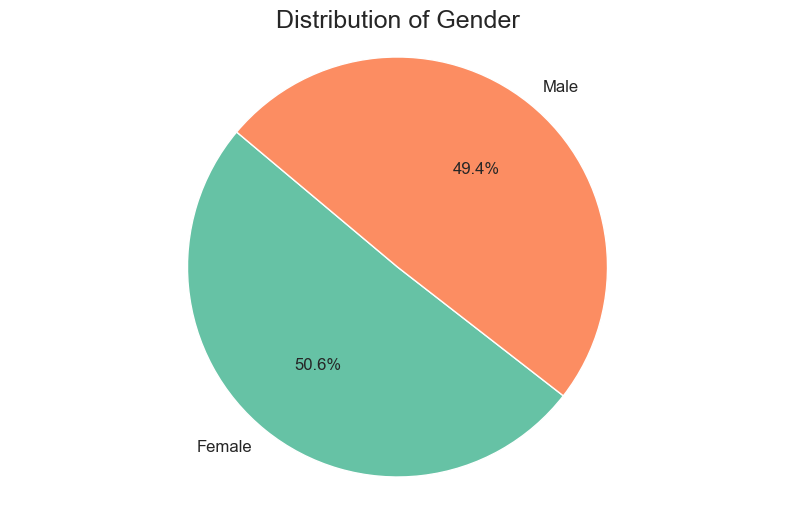

In [34]:
# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the count of each category in 'Gender'
gender_counts = je['Gender'].value_counts()

# Define colors for the pie chart
colors = sns.color_palette('Set2', len(gender_counts))

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\2177141132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Socioeconomic_Status', data=je, palette='Set3')


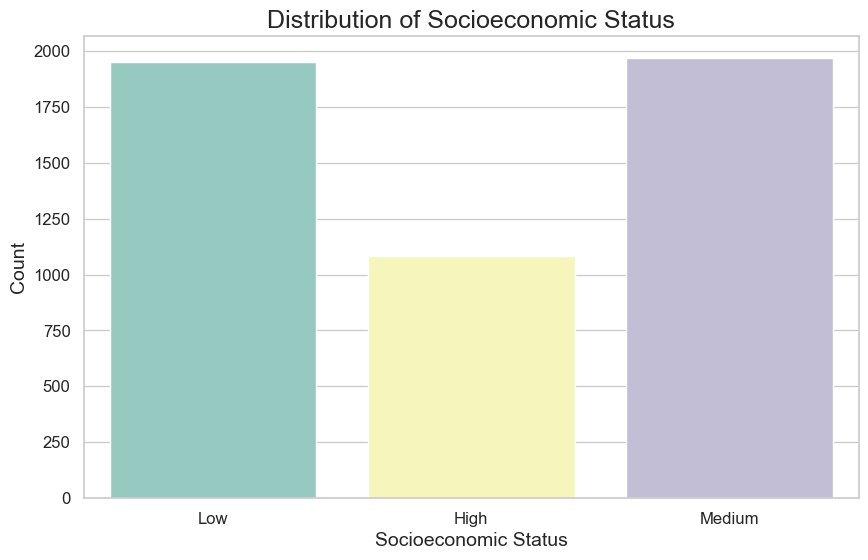

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Socioeconomic_Status', data=je, palette='Set3')
plt.title('Distribution of Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\3015369733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parent_Education_Level', data=je, palette='Set1')


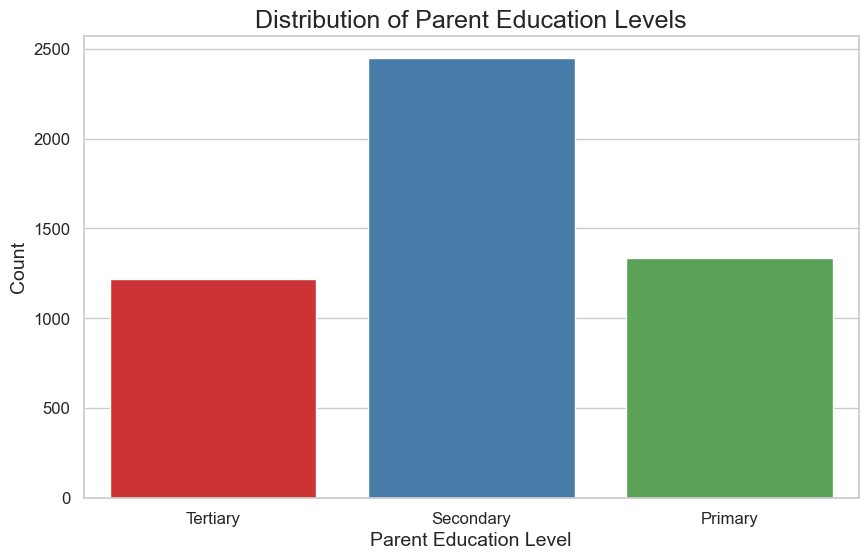

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parent_Education_Level', data=je, palette='Set1')
plt.title('Distribution of Parent Education Levels')
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.show()


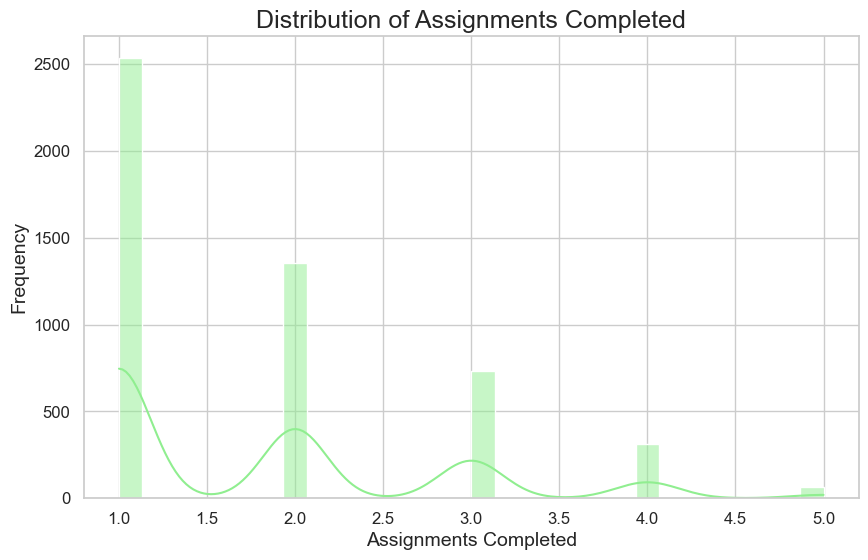

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(je['Assignments_Completed'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Assignments Completed')
plt.xlabel('Assignments Completed')
plt.ylabel('Frequency')
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\2675601778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Teacher_Quality', y='JAMB_Score', data=je, palette='Set2')


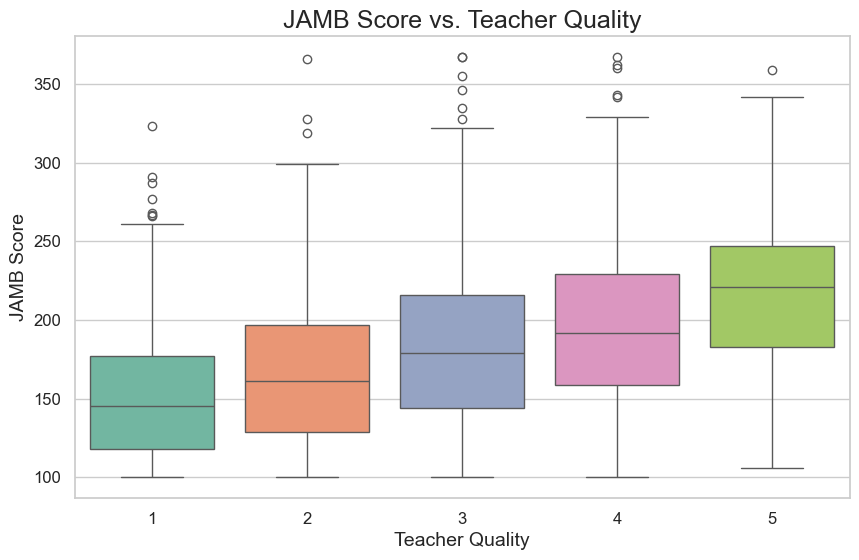

In [39]:
# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# JAMB_Score vs. Teacher_Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Teacher_Quality', y='JAMB_Score', data=je, palette='Set2')
plt.title('JAMB Score vs. Teacher Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('JAMB Score')
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\3476486018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='School_Type', y='JAMB_Score', data=je, palette='Set2')


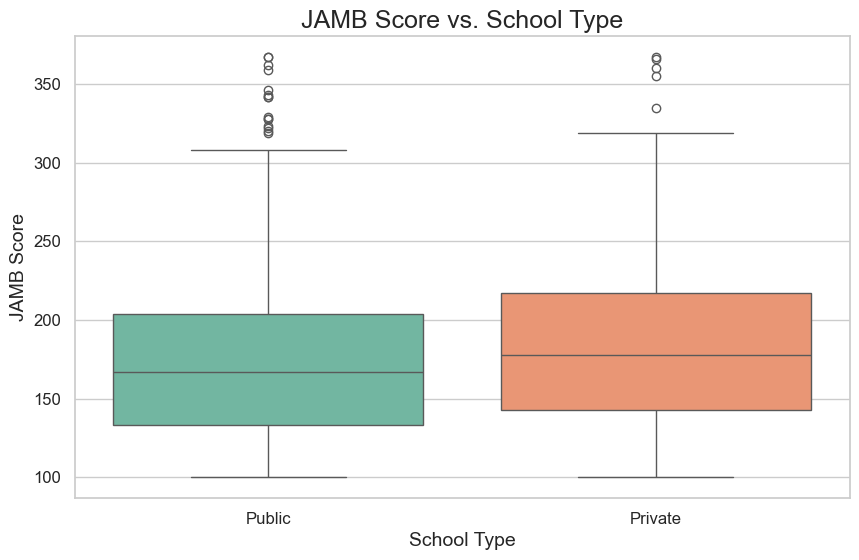

In [41]:
# JAMB_Score vs. School_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='JAMB_Score', data=je, palette='Set2')
plt.title('JAMB Score vs. School Type')
plt.xlabel('School Type')
plt.ylabel('JAMB Score')
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\1013247330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extra_Tutorials', y='JAMB_Score', data=je, palette='Set2')


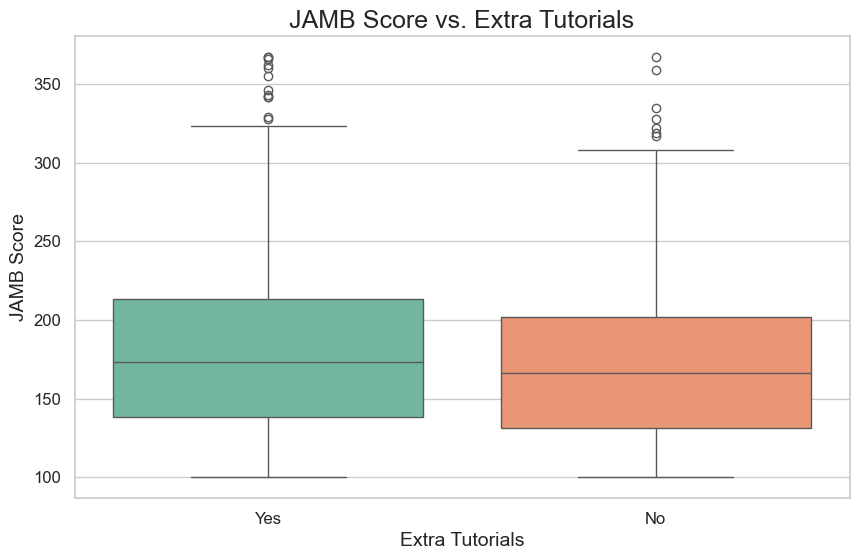

In [43]:
# JAMB_Score vs. Extra_Tutorials
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extra_Tutorials', y='JAMB_Score', data=je, palette='Set2')
plt.title('JAMB Score vs. Extra Tutorials')
plt.xlabel('Extra Tutorials')
plt.ylabel('JAMB Score')
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_12632\2935274094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IT_Knowledge', y='JAMB_Score', data=je, palette='Set2')


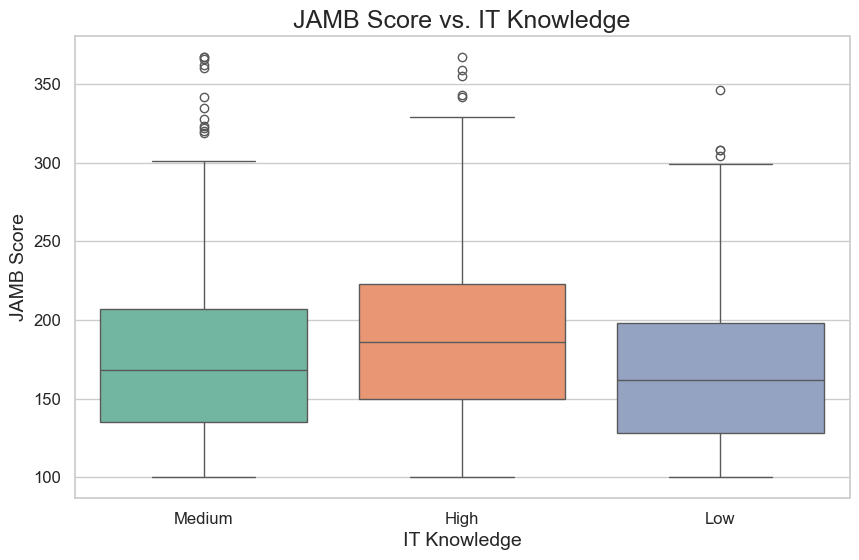

In [45]:
# JAMB_Score vs. IT_Knowledge
plt.figure(figsize=(10, 6))
sns.boxplot(x='IT_Knowledge', y='JAMB_Score', data=je, palette='Set2')
plt.title('JAMB Score vs. IT Knowledge')
plt.xlabel('IT Knowledge')
plt.ylabel('JAMB Score')
plt.show()